# Data collection

In [9]:
from feature_extraction import *
import pandas as pd
import numpy as np
import warnings

# for plots
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data3.csv")
data

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall
...,...,...,...,...,...,...,...
96795,7.30,-1.16,-4.58,18.19,3.60,-35.77,light
96796,7.39,-0.37,-5.05,20.08,0.06,-34.55,light
96797,7.52,-1.46,-5.82,22.58,0.12,-28.02,light
96798,7.58,-2.14,-6.31,19.47,2.44,-22.52,light


# Preprocessing

In [35]:
flat_data = flatten_ts(data)
flat_data

,xAcc_1,xAcc_2,xAcc_3,xAcc_4,xAcc_5,xAcc_6,xAcc_7,xAcc_8,xAcc_9,xAcc_10,...,zGyro_392,zGyro_393,zGyro_394,zGyro_395,zGyro_396,zGyro_397,zGyro_398,zGyro_399,zGyro_400,label
0,6.99,6.51,6.22,6.34,6.49,6.55,6.27,6.67,6.79,6.72,...,-0.67,-1.10,-1.34,-1.28,-1.04,-0.98,-0.98,-0.98,-1.10,fall
1,6.89,6.61,6.48,6.45,6.75,6.90,6.70,6.55,6.47,6.64,...,-0.43,-0.73,-0.85,-1.04,-1.04,-1.34,-0.79,-0.92,-0.67,fall
2,5.92,5.89,5.83,5.89,5.94,5.90,5.79,5.88,6.02,5.98,...,22.77,23.86,26.43,34.36,39.92,39.67,37.78,38.09,36.19,fall
3,6.88,6.49,6.41,6.09,5.62,5.67,7.41,12.76,7.47,6.55,...,0.06,3.05,1.46,-3.05,-3.78,-4.94,-4.21,-2.56,1.40,fall
4,6.56,6.12,6.17,6.41,6.35,5.88,5.36,5.16,12.62,9.95,...,-16.78,-24.23,-29.91,-28.75,-20.26,-9.89,-9.58,-18.62,-35.58,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,6.59,6.94,7.21,6.72,6.58,6.51,6.77,8.18,10.87,8.51,...,-6.47,-1.59,4.27,-4.70,-15.20,-17.40,-12.88,-16.66,-23.13,light
238,6.86,6.81,6.63,6.60,6.41,7.32,9.05,9.84,8.77,7.39,...,-14.71,-22.28,-26.18,-31.07,-37.66,-48.46,-50.66,-35.52,-21.06,light
239,6.78,8.19,7.49,7.53,6.69,8.30,8.30,7.21,6.68,6.70,...,16.24,18.68,18.80,18.31,14.28,5.86,4.33,15.14,24.60,light
240,8.42,8.20,7.70,8.13,8.70,8.70,8.16,7.48,7.65,7.78,...,-7.08,-10.86,-10.62,-5.62,1.71,11.35,15.69,18.62,22.95,light


In [36]:
warnings.filterwarnings('ignore')
df, labels = vec_sum(flat_data)
df["label"] = labels

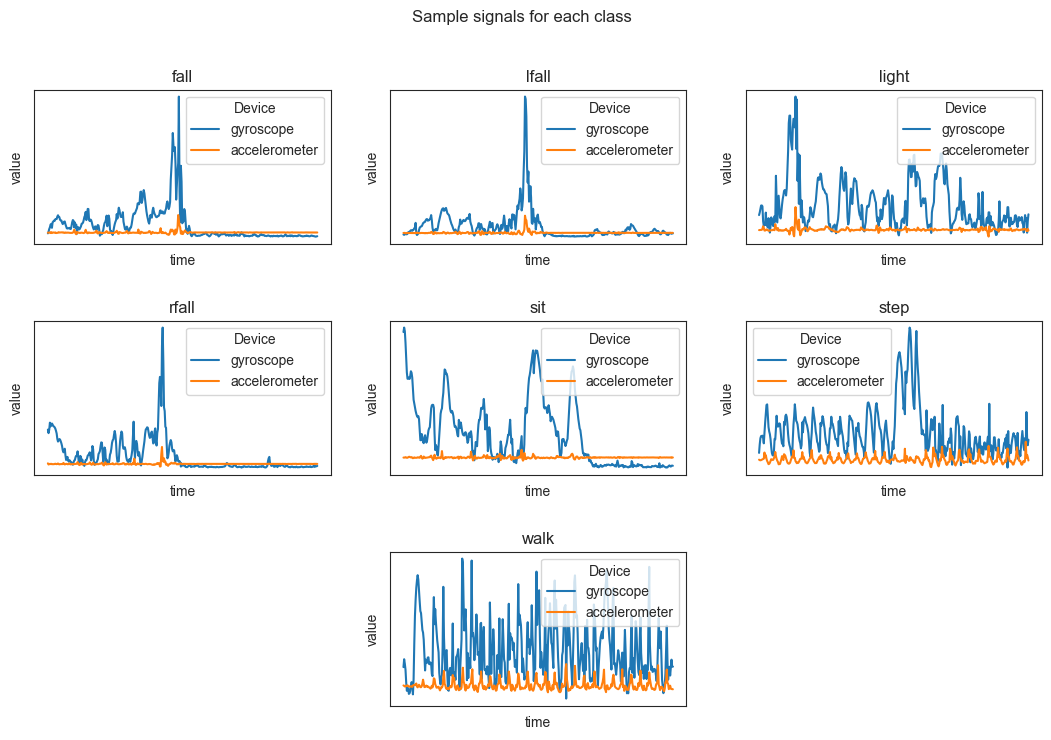

In [70]:
# Select one row for each different label class
sampled_rows = df.groupby('label').apply(lambda x: x.sample(1))

# plot a patterns
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0

sns.set_style("ticks")
for label, row in sampled_rows.iterrows():
    if i==6:
        i=7
    acc = np.array(row[[col for col in row.index if col.startswith('acc')]])
    gyr = np.array(row[[col for col in row.index if col.startswith('gyr')]])
    temp = pd.DataFrame({"value":acc,
                          "time":np.arange(len(acc)),
                          "Device": "accelerometer"})
    temp1 = pd.DataFrame({"value":gyr,
                          "time":np.arange(len(acc)),
                          "Device": "gyroscope"})
    temp = pd.concat([temp1,temp])

    sns.lineplot(data=temp, x="time", y="value", hue="Device", ax = ax[pos[i]], legend="brief")
    ax[pos[i]].set_title(label[0])
    # Remove x and y axis ticks since uninformative
    ax[pos[i]].set_xticks([])
    ax[pos[i]].set_yticks([])
    i+=1

plt.suptitle("Sample signals for each class")
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.delaxes(ax[pos[6]])
plt.delaxes(ax[pos[8]])
plt.show()

### FFT Magnitude

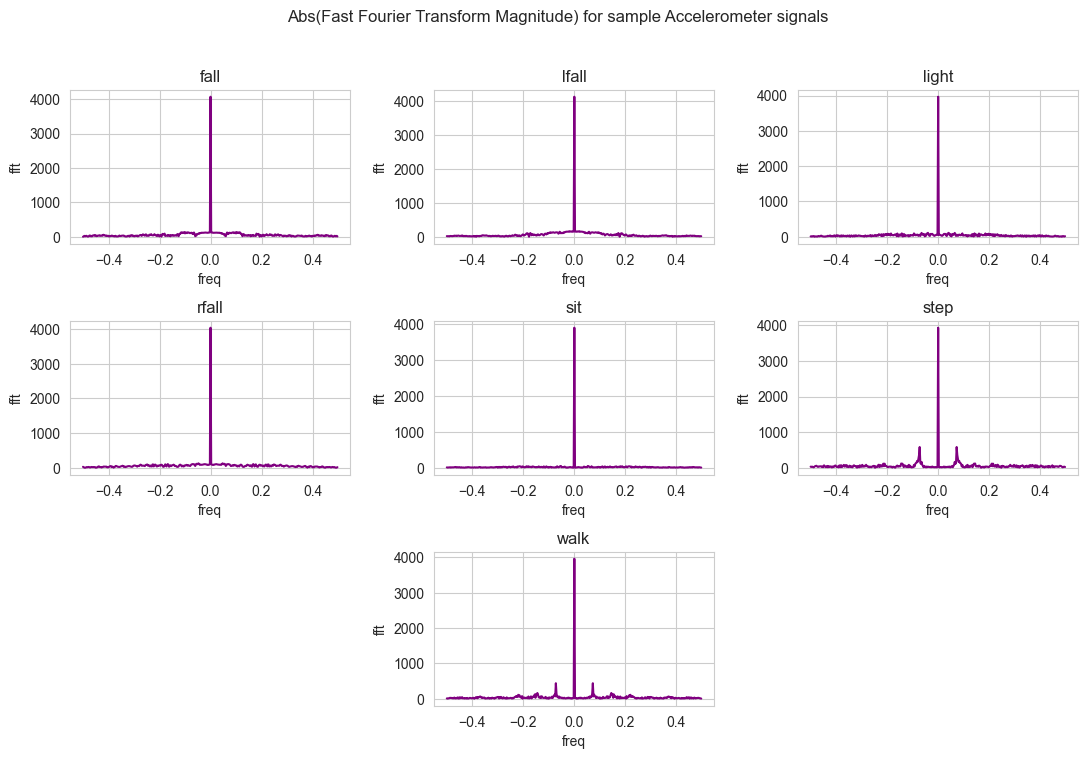

In [71]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0
for label, row in sampled_rows.iterrows():
    if i==6:
        i=7
    acc = np.array(row[[col for col in row.index if col.startswith('acc')]])
    fourier_data = fft(acc) # take the magnitudes
    magnitudes = np.abs(fourier_data)
    n = len(acc)
    temp = pd.DataFrame({"fft": magnitudes,
                          "freq": fftfreq(n)})

    sns.lineplot(data=temp, x="freq", y="fft", ax = ax[pos[i]], color="purple")
    # ax[pos[i]].axvline(x=0, color='purple', linestyle='--', label='Symmetry Axis')
    # ax[pos[i]].text(0, 15e4, 'Symmetry Axis', rotation=90, va='center', ha='right', color='purple')
    ax[pos[i]].set_title(label[0])
    i+=1

plt.suptitle("Abs(Fast Fourier Transform Magnitude) for sample Accelerometer signals")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.delaxes(ax[pos[6]])
plt.delaxes(ax[pos[8]])
plt.show()

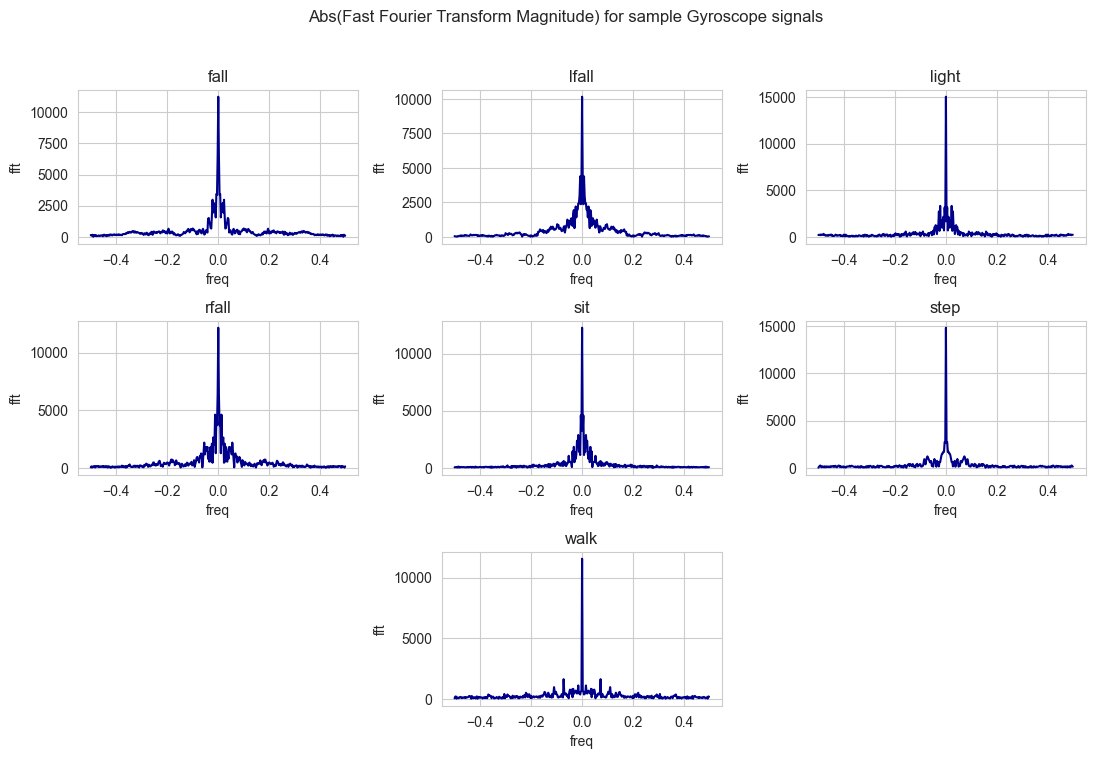

In [72]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0

for label, row in sampled_rows.iterrows():
    if i==6:
        i=7
    gyr = np.array(row[[col for col in row.index if col.startswith('gyr')]])
    fourier_data = fft(gyr) # take the magnitudes
    magnitudes = np.abs(fourier_data)
    n = len(acc)
    temp = pd.DataFrame({"fft": magnitudes,
                          "freq": fftfreq(n)})

    sns.lineplot(data=temp, x="freq", y="fft", ax = ax[pos[i]], color="darkblue")
    # ax[pos[i]].axvline(x=0, color='purple', linestyle='--', label='Symmetry Axis')
    # ax[pos[i]].text(0, 15e4, 'Symmetry Axis', rotation=90, va='center', ha='right', color='purple')
    ax[pos[i]].set_title(label[0])
    i+=1

plt.suptitle("Abs(Fast Fourier Transform Magnitude) for sample Gyroscope signals")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.delaxes(ax[pos[6]])
plt.delaxes(ax[pos[8]])
plt.show()

### Power spectrum peaks

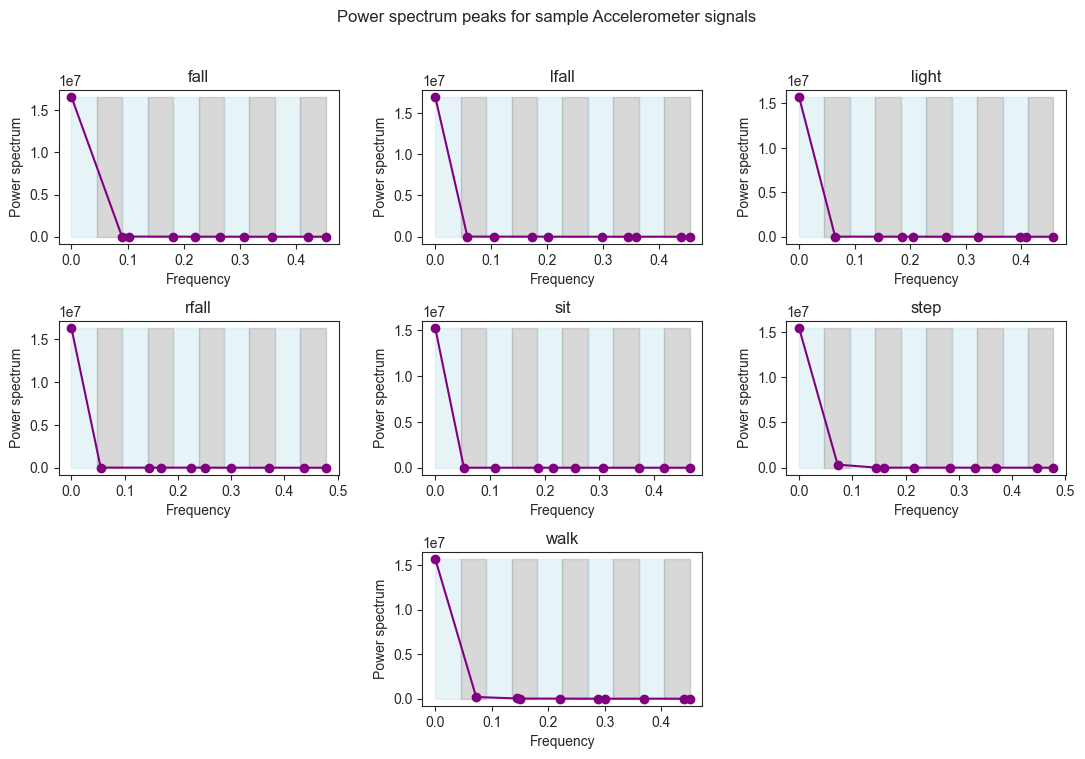

In [73]:
sns.set_style("ticks")
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0

for label, row in sampled_rows.iterrows():
    if i==6:
        i=7
    acc = np.array(row[[col for col in row.index if col.startswith('acc')]])
    max_ps = fourier_magnitudes(acc, plot=True)
    freq = list(fftfreq(int(len(acc)/2)))

    num_bins = 10
    hist_counts, bin_edges = np.histogram(max_ps[0], bins=num_bins)

    ax[pos[i]].plot(max_ps[0], max_ps[1], marker="o", color="purple")
    ax[pos[i]].set_xlabel('Frequency')
    ax[pos[i]].set_ylabel('Power spectrum')
    ax[pos[i]].set_title(label[0])
    # Add transparent bands using fill_between for each bin
    for k in range(num_bins):
        lower_band = bin_edges[k]
        upper_band = bin_edges[k + 1]
        if k%2==0:
            ax[pos[i]].fill_betweenx([0, max(max_ps[1])], lower_band, upper_band, alpha=0.3, color='lightblue')
        else:
            ax[pos[i]].fill_betweenx([0, max(max_ps[1])], lower_band, upper_band, alpha=0.3, color='gray')
    i+=1

plt.suptitle("Power spectrum peaks for sample Accelerometer signals")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.delaxes(ax[pos[6]])
plt.delaxes(ax[pos[8]])
plt.show()

Note that for the accelerometer the magnitude at frequence=0 is the same for each type of signal. This is not true for the gyroscope since it seems that for every signal has a peak at freq=0 BUT this peak has different magnitude in each case

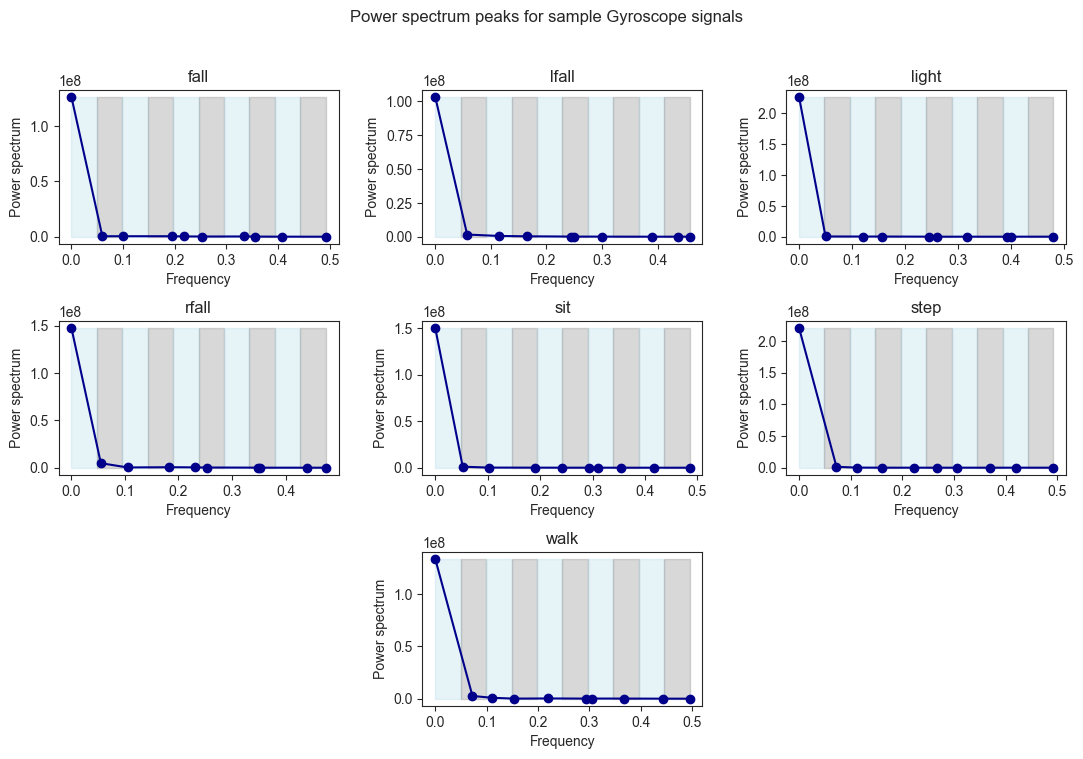

In [74]:
sns.set_style("ticks")
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0

for label, row in sampled_rows.iterrows():
    if i==6:
        i=7
    acc = np.array(row[[col for col in row.index if col.startswith('gyr')]])
    max_ps = fourier_magnitudes(acc, plot=True)
    freq = list(fftfreq(int(len(acc)/2)))

    num_bins = 10
    hist_counts, bin_edges = np.histogram(max_ps[0], bins=num_bins)

    ax[pos[i]].plot(max_ps[0], max_ps[1], marker="o", color="darkblue")
    ax[pos[i]].set_xlabel('Frequency')
    ax[pos[i]].set_ylabel('Power spectrum')
    ax[pos[i]].set_title(label[0])
    # Add transparent bands using fill_between for each bin
    for k in range(num_bins):
        lower_band = bin_edges[k]
        upper_band = bin_edges[k + 1]
        if k%2==0:
            ax[pos[i]].fill_betweenx([0, max(max_ps[1])], lower_band, upper_band, alpha=0.3, color='lightblue')
        else:
            ax[pos[i]].fill_betweenx([0, max(max_ps[1])], lower_band, upper_band, alpha=0.3, color='gray')
    i+=1

plt.suptitle("Power spectrum peaks for sample Gyroscope signals")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.delaxes(ax[pos[6]])
plt.delaxes(ax[pos[8]])
plt.show()


### 1. MAYBE REMOVING THE FIRST PEAK WE'RE GOING TO BE WAY MORE PRECISE
### 2. MAYBE WE MAY TRY WITH DIFFERENT NUMBER OF BINS (PEAKS) RELATING ON A SORT OF CV FOR FEATURE SELECTION
### 3. WE SHOULD TRY CONTINUOS WAVELETS TRANSFORMS... BUT THEY WOULD NEED A CORRECT FUNCTION FROM LITERATURE

For now let's go on with this peaks and extrapolate

In [75]:
df = df.drop("label", axis=1)
prova = preproc(df, labels)
prova

,acc_max_mag_1,acc_max_mag_2,acc_max_mag_3,acc_max_mag_4,acc_max_mag_5,acc_max_mag_6,acc_max_mag_7,acc_max_mag_8,acc_max_mag_9,acc_max_mag_10,...,gyr_max_mag_2,gyr_max_mag_3,gyr_max_mag_4,gyr_max_mag_5,gyr_max_mag_6,gyr_max_mag_7,gyr_max_mag_8,gyr_max_mag_9,gyr_max_mag_10,label
0,1.679561e+07,10801.345361,15443.379045,2494.648966,3506.348890,2881.347046,3416.295521,5800.178632,2368.599631,1473.222493,...,9.592757e+05,5.119511e+05,312838.119283,147240.538463,211720.022095,109374.244172,20964.153534,45291.483985,121592.068026,fall
1,1.666644e+07,10751.749903,22126.371544,7530.281961,6636.895371,4383.290907,5607.831278,4917.174318,1942.169619,3949.116959,...,2.627339e+06,6.657685e+05,465629.751594,116254.560780,361048.330523,248070.905590,182901.528829,45836.603978,57632.006013,fall
2,1.690417e+07,15663.913171,18483.969593,15089.006454,12469.690810,5080.274593,9184.062217,4675.716777,2361.136182,1662.668453,...,4.886385e+06,7.235702e+05,791065.811944,532990.905611,168062.542131,82527.888710,74912.734801,50200.552175,36780.468990,fall
3,1.690057e+07,27834.293492,58377.754093,9126.588154,8483.198818,5839.101415,3133.863000,1640.416392,3341.617160,4192.033963,...,4.422935e+06,6.838762e+05,380239.911926,266260.475134,219481.118060,135248.631338,136101.761931,117920.069358,73855.265233,fall
4,1.742747e+07,124734.902539,55886.725130,12170.351645,12544.880766,6504.401602,3993.475932,7620.558801,2822.194933,4559.995931,...,2.053406e+06,1.452541e+06,416519.314624,492788.710548,190757.846448,194313.119283,226042.230682,239743.219263,212045.393820,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.638037e+07,16388.013912,11433.622947,12350.902330,15188.694745,6893.254251,3960.388446,803.969797,2660.412913,1624.898955,...,3.910192e+06,7.194042e+05,389663.003137,112379.522034,80732.642351,27678.196355,53746.852251,54694.151567,19737.802113,light
238,1.660464e+07,14302.864306,19305.212301,10808.249385,9077.769379,2102.045811,1453.138115,4566.588317,2296.186942,4651.806443,...,1.995195e+06,5.912486e+05,374060.032924,388659.395310,198740.942220,116755.550328,74039.095038,66162.299579,27381.467173,light
239,1.612340e+07,25131.303791,5905.058076,7903.859218,7405.519345,5113.755937,3755.953231,2746.683025,1416.069762,519.482796,...,3.504227e+06,1.211368e+06,554021.651008,124375.185208,197765.321892,96612.083350,60328.711581,36068.002933,46641.073757,light
240,1.613424e+07,6998.180669,15515.727474,10728.015104,4613.584971,1830.390414,812.754564,894.438233,1391.102353,1359.595058,...,1.856985e+06,1.246336e+06,233156.631661,205460.243089,112661.289028,127789.433541,80630.341534,72817.869024,21806.228030,light


# Split, scale etc... for the algorithms

In [76]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# for first and future models
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [77]:
# labels
y = prova["label"]
prova = prova.drop("label", axis=1)

# split data 
X_train, X_test, y_train, y_test = train_test_split(prova, y, test_size=0.3)

# scale the features (may be useful if we are going to add other features with different scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

# First logistic - with all the classes (7)

In [78]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train)
preds = sgd_clf.predict(X_test_scaled)


Check for the correct classes

In [79]:
sgd_clf.classes_

array(['fall', 'lfall', 'light', 'rfall', 'sit', 'step', 'walk'],
      dtype='<U5')

In [80]:
accuracy_score(y_test, preds)

0.7671232876712328

In [81]:
confusion_matrix(y_test, preds)

array([[12,  1,  2,  1,  0,  0,  1],
       [ 1,  3,  0,  0,  0,  0,  0],
       [ 3,  0, 17,  0,  1,  0,  0],
       [ 2,  1,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  1,  3,  0],
       [ 0,  0,  0,  0,  0,  1, 10]], dtype=int64)

# Linear classifier with RandomizedSearchCV

I tried before with Randomized Search but I thought it skipped essential combinations since it always returned different results in terms of "best_params" (it didn't converge), also for high number of iterations.

Now the results seems "more stable" for some of the parameters but sometimes we obtain pretty diFSerent parameters

In [82]:
linear_params = {"loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
                   "penalty": ["l1", "l2", "elasticnet", None],
                   "alpha": [0.0001, 0.01, 0.1],
                   "fit_intercept": [True, False],
                   "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

linear_search = GridSearchCV(sgd_clf, linear_params, scoring="accuracy", n_jobs=-1, cv=20)

fitted_linear_cv = linear_search.fit(X_train, y_train)

I tried GridSearch for different number of "folds" and the results seems to improve with an increasing number of folds

In [83]:
fitted_linear_cv.best_params_

{'alpha': 0.1,
 'fit_intercept': True,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'penalty': None}

In [84]:
new_sgd_clf = fitted_linear_cv.best_estimator_
new_sgd_clf.fit(X_train_scaled, y_train)
new_preds = new_sgd_clf.predict(X_test_scaled)

I tried both RandomizedSearchCV and GridSearchCV... but both underperform the default settings... we should check for the warnings/errors when trying "illegal" parameter combo 

In [85]:
accuracy_score(y_test, new_preds)

0.726027397260274

Now this last value of accuracy seems to stabilize a little bit with 20 folds but anytime we rerun the cell with the "new_sgd_clf" algorithm (2 cells above) results slightly change (between 0.65 and 0.83 of accuracy)

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_clf = RandomForestClassifier()

rf_params = {"n_estimators": [100, 200, 500, 50, 1000],
            "criterion": ["gini", "entropy", "log_loss", None],
            "max_depth": [None, 100, 50],
            "bootstrap": [True, False],
            "max_features": ["sqrt", "log2", None],
            }

rf_search = RandomizedSearchCV(rf_clf, rf_params, scoring="accuracy", n_jobs=-1, cv=10, n_iter=100)

fitted_rf_cv = rf_search.fit(X_train, y_train)

In [88]:
fitted_rf_cv.best_params_

{'n_estimators': 500,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': False}

Ok, accuracy seems to improve towards the upper bound obtained for the linear model: in case of random forest the performance value stabilized for each possible combo of parameters (also if we use an higher numer of iterations for the Randomized Search CV)

In [89]:
rf_clf = fitted_rf_cv.best_estimator_
rf_clf.fit(X_train_scaled, y_train)
rf_preds = rf_clf.predict(X_test_scaled)
accuracy_score(y_test, rf_preds)

0.684931506849315

Quick Disclaimer: I think it isn't really useful to try out a larger CV (both in terms of number of folds and in terms of number of iterations) since the accuracy is always the same and the "best parameters" selected by the CV are mostly the same.

# XGBoost

In [90]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [91]:
# we need to encode the labels for xgboost package
le = LabelEncoder()
le.fit(y_train.unique())
y_tr = le.transform(y_train)
y_te = le.transform(y_test)

xgb_clf = XGBClassifier(tree_method="hist", early_stopping_rounds=2)
xgb_clf.fit(X_train, y_tr, eval_set=[(X_test, y_te)])
xgb_preds = xgb_clf.predict(X_test)

[0]	validation_0-mlogloss:1.49608
[1]	validation_0-mlogloss:1.29731
[2]	validation_0-mlogloss:1.16584
[3]	validation_0-mlogloss:1.08881
[4]	validation_0-mlogloss:1.02614
[5]	validation_0-mlogloss:0.99309
[6]	validation_0-mlogloss:0.95483
[7]	validation_0-mlogloss:0.93598
[8]	validation_0-mlogloss:0.92788
[9]	validation_0-mlogloss:0.91285
[10]	validation_0-mlogloss:0.90036
[11]	validation_0-mlogloss:0.88830
[12]	validation_0-mlogloss:0.87933
[13]	validation_0-mlogloss:0.88215
[14]	validation_0-mlogloss:0.86641
[15]	validation_0-mlogloss:0.87542
[16]	validation_0-mlogloss:0.88081


Ouffffff improving again... too strong for this project

In [92]:
accuracy_score(y_te, xgb_preds)

0.684931506849315

# KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn_clf = KNeighborsClassifier()
knn_params = {"n_neighbors": np.array(range(0,201, 5)),
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size": [30, 100, 50, 150],
            "p": [1, 2, 3]
            }
knn_search = RandomizedSearchCV(knn_clf, knn_params, scoring="accuracy", n_jobs=-1, cv=10, n_iter=200)

fitted_knn_cv = knn_search.fit(X_train, y_train)

In [95]:
fitted_knn_cv.best_params_

{'p': 1, 'n_neighbors': 15, 'leaf_size': 150, 'algorithm': 'ball_tree'}

In [96]:
knn_clf = fitted_knn_cv.best_estimator_
knn_clf.fit(X_train_scaled, y_train)
knn_preds = knn_clf.predict(X_test_scaled)
accuracy_score(y_test, knn_preds)

0.6712328767123288

Knn seems to not well perform in any case also adding iterations to the Randomized Search to best approximate the best params: accuracy is stuck at 0.69

# Wavelets

We approximate our signal patterns with Morlet wavelets. We use large value for the width of the wavelets since it corresponds to broader wavelets, which are more appropriate for capturing lower-frequency features.

In [197]:
from scipy.signal import cwt, morlet

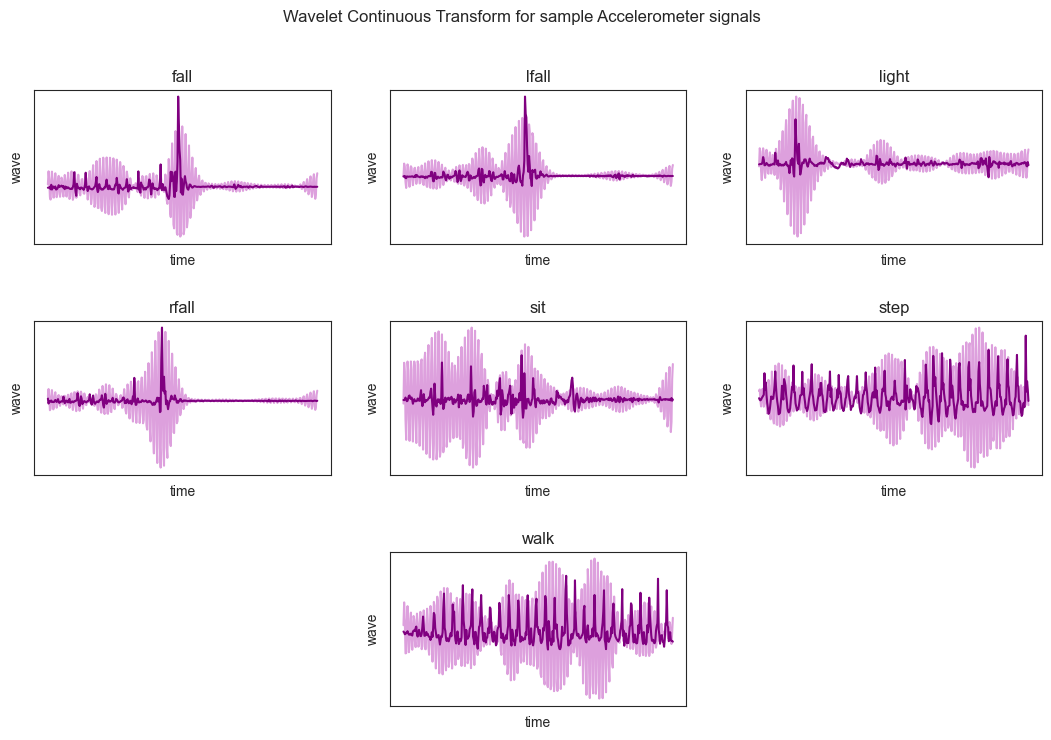

In [98]:
sns.set_style("ticks")
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0

for label, row in sampled_rows.iterrows():
    if i==6:
        i=7
    vec = np.array(row[[col for col in row.index if col.startswith('acc')]])
    centered_acc = vec - np.mean(vec)
    wave = cwt(vec, morlet, [20])
    wave = wave.reshape(len(acc),)
    temp = pd.DataFrame({"value": centered_acc,
                          "time": np.arange(len(acc)),
                          "wave": wave})
    sns.lineplot(data=temp, x="time", y="wave", ax = ax[pos[i]], color="plum")
    sns.lineplot(data=temp, x="time", y="value", ax = ax[pos[i]], color="purple")
    ax[pos[i]].set_title(label[0])
    # Remove x and y axis ticks since uninformative
    ax[pos[i]].set_xticks([])
    ax[pos[i]].set_yticks([])
    i+=1

plt.suptitle("Wavelet Continuous Transform for sample Accelerometer signals")
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.delaxes(ax[pos[6]])
plt.delaxes(ax[pos[8]])
plt.show()

In [99]:
def cwt_coeff(peak_wave, mother_wave, scale, translation):
    std_mother_wave = (mother_wave - translation)/scale
    coeff = sum(peak_wave * std_mother_wave)/np.sqrt(scale)
    return coeff

def max_cwt_coeff(peak_wave, mother_wave):
    max_coeff = np.NINF
    translation_vec = np.arange(10, 30, 10)
    for b in translation_vec:
        new_coeff = cwt_coeff(peak_wave, mother_wave, 2, b)
        if new_coeff > max_coeff:
            max_coeff = new_coeff
    return max_coeff

In [100]:
def peakes_wavelet_approx(signal, mother_wave, plot=False, label=None):
    half_window = 20 # number of sampled values in our data collection in 2 seconds of time
    threshold = 1.9 * 9.81 
    peaks = signal[signal >= threshold]

    if len(peaks) == 0:
        if plot:
            print("There are no peaks!")
        return 0
    indexes = np.where(signal >= threshold)[0]
    peaks_df = pd.DataFrame({"peak": peaks, "idx": np.array(indexes, dtype=int)})
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(10,5))
    for row in peaks_df.iterrows():
        idx = int(row[1].idx)
        # take the values inside the window centered around the actual peak
        # but first check if the peak is in extreme positions of the signal
        if (idx - half_window) < 0:
            temp = signal[: (idx + half_window)]
        elif (idx + half_window) > len(signal):
            temp = signal[(idx - half_window) :]
        else:
            temp = signal[(idx - half_window): (idx + half_window)]

        # wavelet cont transform of the peak pattern
        peak_wave = cwt(temp, morlet, [18])
        peak_wave = peak_wave.reshape(peak_wave.shape[1],)
        max_cwt = max_cwt_coeff(peak_wave, mother_wave[:len(peak_wave)])
        x = np.arange(0,len(temp))
        # temp = pd.DataFrame({"arr": arr, "wave":wave})
        if plot:
            ax[1].plot(x,peak_wave)
            ax[0].set_title("Peaks signal pattern")
            ax[0].plot(x,temp)
            ax[1].set_title("Peaks Wavelet Transform")
    if plot:
        ax[1].plot(x,mother_wave[:len(x)], color="darkblue", linewidth=4, alpha=0.7)
        plt.suptitle(f'{label.upper()} signal   -   CWD coeff.: {round(abs(max_cwt),3)}')
        plt.show()
    return max_cwt

For now we use a fake wave as benchmark

In [101]:
fake_wave = np.array([-10.56862789-16.52839627j, -17.72219651-13.36742115j,
       -21.59767536 -7.23585558j, -21.0416372  -1.13776653j,
       -17.45392031 +2.0256344j , -13.84914195 +1.36667627j,
       -12.74572324 -1.48642815j, -14.41900947 -3.72450654j,
       -16.85680126 -3.57664981j, -17.49950312 -1.71505979j,
       -15.42254126 -0.71732429j, -12.22282714 -2.99958504j,
       -10.91326839 -8.8775392j , -13.75978524-16.28749829j,
       -20.84716607-22.28565649j, -30.45843392-24.90600242j,
       -40.61052569-23.72239477j, -49.98631648-18.93346654j,
       -57.38802101-10.4992408j , -60.84497987 +1.294968j  ,
       -58.12071197+14.48999708j, -48.61556737+25.30812923j,
       -34.70247211+30.01749647j, -20.87947277+27.3119118j ,
       -11.32061199+19.09756926j,  -7.82340599 +9.18169621j,
        -9.4673406  +1.13230955j, -13.72525527 -3.19301101j,
       -17.97238672 -3.89762187j, -20.55992091 -2.3862615j ,
       -21.15209911 -0.37866065j, -20.41974155 +0.90026934j,
       -19.41787992 +1.06647679j, -19.02990085 +0.47154202j,
       -19.67973413 -0.10546432j, -21.2366022  +0.25673188j,
       -22.95727674 +2.34049979j, -23.54150386 +6.36042392j,
       -21.59732814+11.49716109j, -16.54647292+15.91140679j])

### I did it only for the accelerometer signals!

Notice we also used a really high threshold to reduce the false positives in fall detection!

We can highlight an higher CWD coefficient for falls and the absence of peaks for "Sit".Whereas we note the presence of approximately the same number of peaks for classes that are not about falls, but this peaks present a slight different wavelet profile, also justified by a lower CWD coefficient.

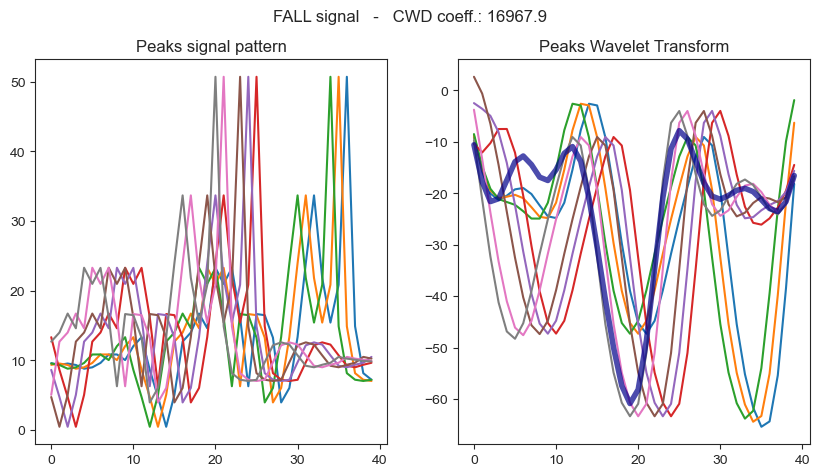

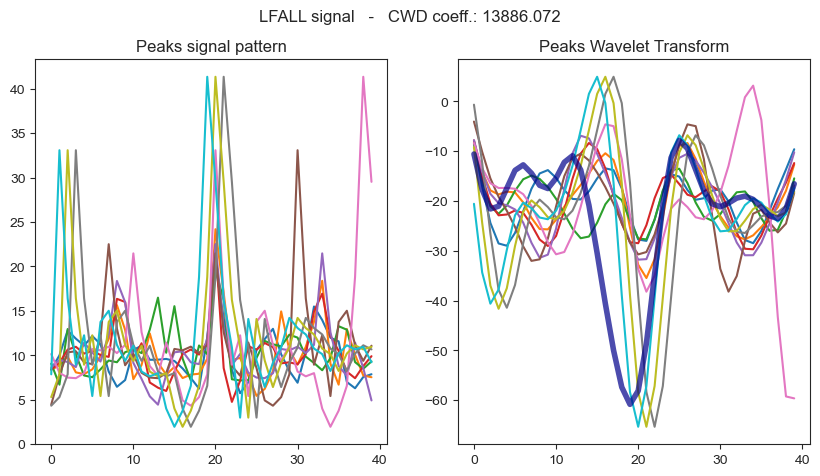

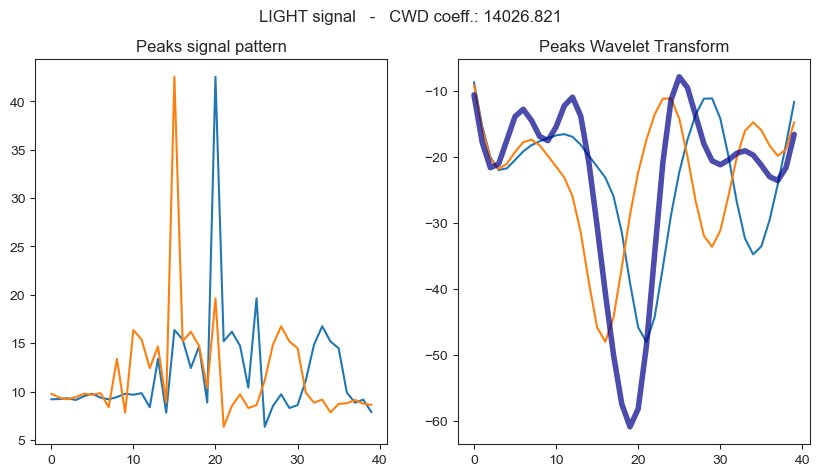

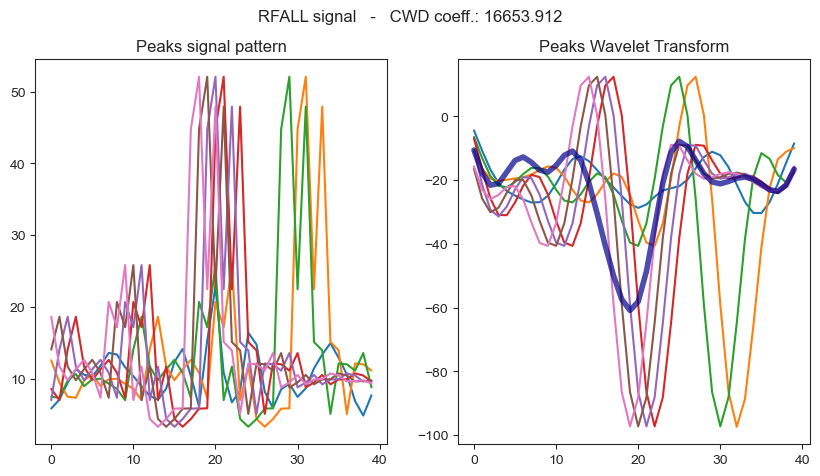

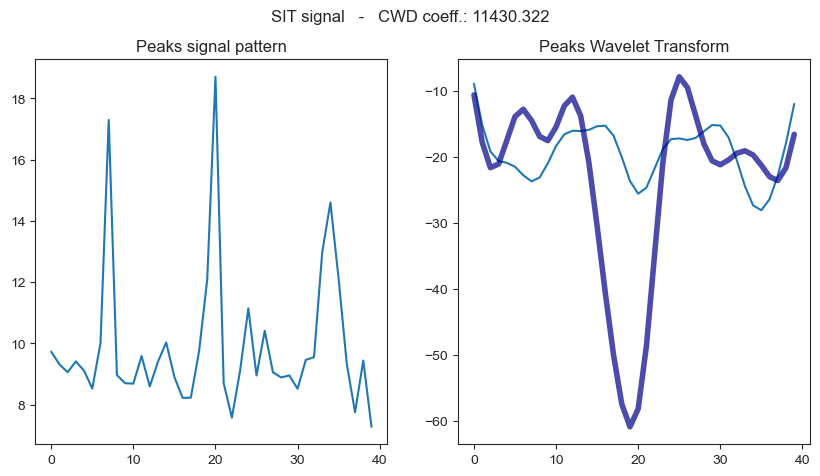

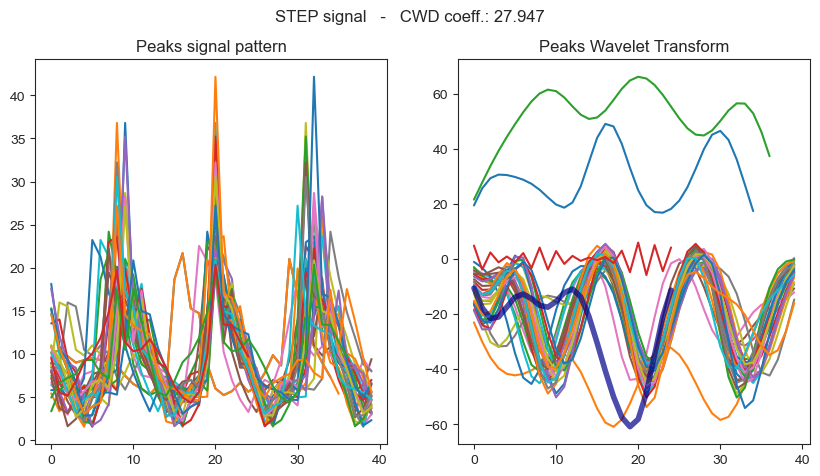

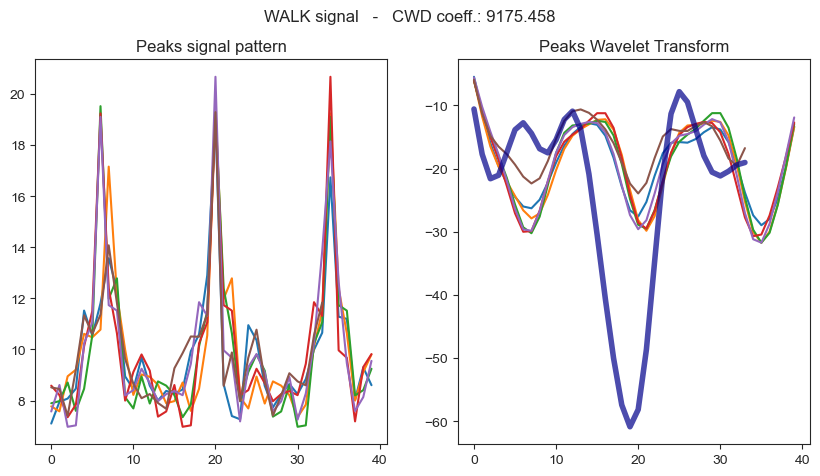

In [41]:
for label, row in sampled_rows.iterrows():
    vec = np.array(row[:-1], dtype=np.float32)[:400]
    res = peakes_wavelet_approx(vec, fake_wave, True, label[0])

Apply max continuous wavelet transform coefficient to each accelerometer signal

In [44]:
def acc_max_cwt(row, mother_wave):
    row = np.array(row[:400])
    max_coeff = peakes_wavelet_approx(row, mother_wave)
    return max_coeff

# take the rows from the "df" dataframe, since it is the dataframe BEFORE Fast Fourier Transform feature extraction
acc_cwt_coeff = df.apply(lambda x: acc_max_cwt(x,fake_wave), axis=1)

In [10]:
import pandas as pd
import os

# Define the directory where your files are located
directory = 'C:/Users/nicol/Desktop/esami_sapienza/primo_anno_secondo_sem/statistical_learning/project/Fall_or_not_to_fall-main/Fall_or_not_to_fall/file_csv'

# Create empty DataFrames for each category (FB, FF, FS)
df_FB = pd.DataFrame()
df_FF = pd.DataFrame()
df_FS = pd.DataFrame()

# Define the common code to extract 400 rows from a DataFrame
def extract_400_rows(df):
    desired_row_count = 400
    current_row_count = len(df)
    step_size = max(1, current_row_count // desired_row_count)
    selected_indices = range(0, current_row_count, step_size)
    selected_rows = df.iloc[selected_indices]
    return selected_rows.head(desired_row_count)

# Iterate through files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Determine the category based on the file name
        category = filename.split("_")[-1].split(".")[0]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename), header=None)
        
        # Extract 400 rows using the common code
        selected_rows = extract_400_rows(df)
        
        # Append the selected rows to the appropriate DataFrame based on the category
        if category == 'FB':
            df_FB = pd.concat([df_FB, selected_rows], ignore_index=True)

        elif category == 'FF':
            df_FF = pd.concat([df_FF, selected_rows], ignore_index=True)
            
        elif category == 'FS':
            df_FS = pd.concat([df_FS, selected_rows], ignore_index=True)
           

# Now, you have three DataFrames df_FB, df_FF, and df_FS containing 400 rows each from the respective categories.


In [11]:
df_FF.columns = ["Acc_x", "Acc_y", "Acc_z", "Time(s)"]
df_FS.columns = ["Acc_x", "Acc_y", "Acc_z", "Time(s)"]
df_FB.columns = ["Acc_x", "Acc_y", "Acc_z", "Time(s)"]

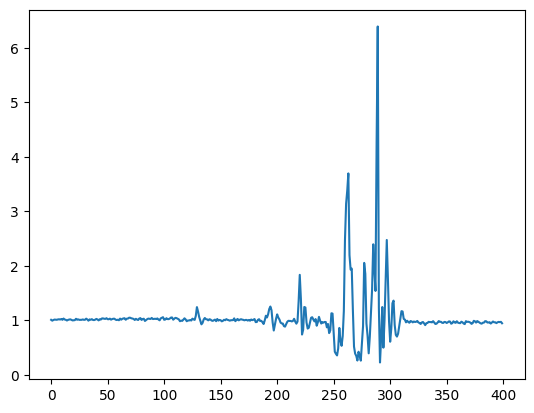

In [5]:
plt.plot(np.arange(0,400), np.sqrt(df_FF["Acc_x"].iloc[0:400]**2 + df_FF["Acc_y"].iloc[0:400]**2 +  df_FF["Acc_z"].iloc[0:400]**2))

In [4]:
def find_peak(signal, plot=False, label=None):
    half_window = 20 # number of sampled values in our data collection in 2 seconds of time
    threshold = 1.79*9.81
    peaks = signal[signal >= threshold]

    if len(peaks) == 0:
        if plot:
            print("There are no peaks!")
        return 0
    indexes = np.where(signal >= threshold)[0]
    peaks_df = pd.DataFrame({"peak": peaks, "idx": np.array(indexes, dtype=int)})
    return peaks_df

In [5]:
def find_max_peak(signal):
    max_value = np.max(signal)
    max_index = np.argmax(signal)
    peak_df = pd.DataFrame({"peak": [max_value], "idx": [max_index]})
    return peak_df

In [6]:
def build_mother(signal):
     half_window = 20
     peak_df = find_max_peak(signal)
     idx = peak_df["idx"].iloc[0]
     # take the values inside the window centered around the actual peak
     # but first check if the peak is in extreme positions of the signal
     if (idx - half_window) < 0:
        temp = signal[: (idx + half_window)]
     elif (idx + half_window) > len(signal):
        temp = signal[(idx - half_window) :]
     else:
         temp = signal[(idx - half_window):(idx + half_window)]
       
     return temp       

In [7]:
const = 9.81

In [12]:
## FORWARD FALLS

## Adding the genric label fall
df_FF["label"] = "fall"
## Drop the column Time(s)
df_FF_new = df_FF.drop(["Time(s)"], axis = 1)
## Flatting the data to use the previous functions
df_FF_new_flatted = flatten_ts(df_FF_new)
## Calculating the magnitude of the acceleration to obtain the final time series
warnings.filterwarnings('ignore')
df_FF_new, labels_FF = vec_sum2(df_FF_new_flatted)
df_FF_new["label"] = labels_FF
## moltiply per 9.81
df_FF_new.iloc[:, :400] = df_FF_new.iloc[:, :400] * const

In [13]:
## SIDEWAY FALLS

## Adding the genric label fall
df_FS["label"] = "fall"
## Drop the column Time(s)
df_FS_new = df_FS.drop(["Time(s)"], axis = 1)
## Flatting the data to use the previous functions
df_FS_new_flatted = flatten_ts(df_FS_new)
## Calculating the magnitude of the acceleration to obtain the final time series
warnings.filterwarnings('ignore')
df_FS_new, labels_FS = vec_sum2(df_FS_new_flatted)
df_FS_new["label"] = labels_FS
## moltiply per 9.81
df_FS_new.iloc[:, :400] = df_FS_new.iloc[:, :400] * const

In [14]:
## BACKWARD FALLS

## Adding the genric label fall
df_FB["label"] = "fall"
## Drop the column Time(s)
df_FB_new = df_FB.drop(["Time(s)"], axis = 1)
## Flatting the data to use the previous functions
df_FB_new_flatted = flatten_ts(df_FB_new)
## Calculating the magnitude of the acceleration to obtain the final time series
warnings.filterwarnings('ignore')
df_FB_new, labels_FB = vec_sum2(df_FB_new_flatted)
df_FB_new["label"] = labels_FB
## moltiply per 9.81
df_FB_new.iloc[:, :400] = df_FB_new.iloc[:, :400] * const

In [15]:
find_max_peak(df_FB_new.iloc[0,:400])

,peak,idx
0,104.00597,197


In [16]:
# Create an empty list to store the results of build_mother
result_dataset = pd.DataFrame()

# Iterate through each row of df_FB_new and apply build_mother
for row in range(len(df_FF_new.iloc[:, :400])):  # Iterate only over the first 400 columns
    result_vector = pd.DataFrame([build_mother(df_FF_new.iloc[row,0:400])])  # Apply build_mother to the row
    result_vector.columns = [f'Col_{i+1}' for i in range(40)]
    result_dataset = pd.concat([result_dataset,result_vector], ignore_index= True, axis=0)


# Calculate the element-wise mean to obtain a final vector


In [ ]:
mother_mean = result_dataset.mean(axis=0)
mother_mean_wavelet = cwt(mother_mean,morlet,[18])


In [17]:
# Create an empty list to store the results of build_mother

# Iterate through each row of df_FB_new and apply build_mother
for row in range(len(df_FS_new.iloc[:, :400])):  # Iterate only over the first 400 columns
    result_vector = pd.DataFrame([build_mother(df_FS_new.iloc[row,0:400])])  # Apply build_mother to the row
    result_vector.columns = [f'Col_{i+1}' for i in range(40)]
    result_dataset = pd.concat([result_dataset,result_vector], ignore_index= True, axis=0)


# Calculate the element-wise mean to obtain a final vector

In [18]:
# Create an empty list to store the results of build_mother

# Iterate through each row of df_FB_new and apply build_mother
for row in range(len(df_FB_new.iloc[:, :400])):  # Iterate only over the first 400 columns
    result_vector = pd.DataFrame([build_mother(df_FB_new.iloc[row,0:400])])  # Apply build_mother to the row
    result_vector.columns = [f'Col_{i+1}' for i in range(40)]
    result_dataset = pd.concat([result_dataset,result_vector], ignore_index= True, axis=0)


# Calculate the element-wise mean to obtain a final vector

In [19]:
result_dataset

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_31,Col_32,Col_33,Col_34,Col_35,Col_36,Col_37,Col_38,Col_39,Col_40
0,3.836048,3.428350,2.588638,4.176365,3.474728,2.574689,5.558191,8.771227,20.156727,18.176374,...,9.640324,5.977274,8.387605,12.890663,13.372186,8.997417,7.210712,6.898852,7.414162,8.766105
1,10.757569,7.879635,6.150440,8.355943,9.674788,8.648280,4.549508,1.898847,2.024156,4.059308,...,6.453230,4.068451,4.800769,3.289914,1.483254,2.603784,4.551111,4.519404,9.392859,10.840938
2,28.871073,26.037320,13.587287,4.766816,12.840593,3.543899,6.188988,10.038530,13.250530,18.478300,...,10.293668,10.865450,13.212861,15.882892,18.884579,17.880677,14.075907,11.601065,10.684869,9.226688
3,17.808661,22.080494,28.658111,30.340927,19.774606,13.530285,11.630757,14.452370,13.350024,11.843526,...,6.555379,3.775168,2.789341,5.525273,9.851887,12.118374,10.724567,8.305590,6.592339,5.555641
4,5.897961,10.283018,11.879460,16.139995,26.640294,32.733996,25.995046,15.524045,9.948006,12.669046,...,9.410785,8.707535,10.614942,12.374893,15.811070,18.341065,18.291311,15.363823,12.976547,9.608782
5,6.136997,5.572023,4.657348,4.517152,3.228330,3.419240,10.478019,17.053073,20.247555,15.514129,...,10.783787,6.272772,3.520154,4.052520,5.244370,6.135445,10.280220,12.015510,11.591508,13.860142
6,8.163495,9.301032,8.573678,7.497202,7.239265,6.855472,7.338742,7.173985,7.304176,7.338339,...,30.767986,27.647505,13.840285,13.456811,4.456845,15.509919,18.262348,17.015439,11.857518,9.426455
7,7.012298,9.102584,9.336487,8.401530,7.845725,7.850673,9.123950,8.912519,9.609837,9.053341,...,27.779445,27.078179,8.761368,21.438727,6.684816,10.194749,23.715326,17.407551,11.690350,11.467584
8,5.296183,7.505554,11.535075,11.344434,6.220536,4.188667,5.269179,7.711870,6.590101,4.772957,...,26.586194,36.419136,23.221691,12.293351,9.351281,7.452669,7.764683,6.474497,8.918896,12.590093
9,6.047586,5.526756,5.088446,4.553659,4.495275,6.704702,5.047401,2.902829,3.407846,7.555481,...,19.845200,15.274973,11.917273,8.570848,5.740767,3.031498,8.552895,10.088701,13.860960,13.472701


In [25]:
first_five = result_dataset.iloc[:5].mean(axis = 0)

# Calcolare la media element-wise per le righe successive 5
next_five = result_dataset.iloc[5:10].mean(axis = 0)

# Calcolare la media element-wise per le righe ancora successive 5
last_five = result_dataset.iloc[10:].mean(axis = 0)

# Creare un nuovo DataFrame con le tre righe di medie
result_df_means = pd.DataFrame([first_five, next_five, last_five])

In [30]:
result_df_means.iloc[0]

Col_1     13.434262
Col_2     13.941763
Col_3     12.572787
Col_4     12.756009
Col_5     14.481002
Col_6     12.206230
Col_7     10.784498
Col_8     10.137004
Col_9     11.745889
Col_10    13.045311
Col_11    11.643448
Col_12    11.643129
Col_13    11.117533
Col_14    10.816150
Col_15    13.467638
Col_16    14.883540
Col_17    18.255881
Col_18    23.433552
Col_19    29.685583
Col_20    42.615349
Col_21    55.046749
Col_22    35.089551
Col_23    20.711815
Col_24    12.743935
Col_25    12.767106
Col_26     8.165752
Col_27     7.354548
Col_28     7.071254
Col_29    10.526312
Col_30    10.568577
Col_31     8.470677
Col_32     6.678776
Col_33     7.961103
Col_34     9.992727
Col_35    11.880595
Col_36    11.988263
Col_37    10.970722
Col_38     9.337747
Col_39     9.412155
Col_40     8.799631
Name: 0, dtype: float64

In [31]:
## FORWARD MOTHER WAVELET
mother_mean_FF = result_df_means.iloc[0]
mother_mean_wavelet_FF = cwt(mother_mean_FF,morlet,[18])

NameError: name 'cwt' is not defined

In [ ]:
## SIDEWAY MOTHER WAVELET
mother_mean_FS = result_df_means.iloc[1]
mother_mean_wavelet_FS = cwt(mother_mean_FS,morlet,[18])

In [ ]:
## BACKWARD MOTHER WAVELET
mother_mean_FB = result_df_means.iloc[2]
mother_mean_wavelet_FB = cwt(mother_mean_FB,morlet,[18])

In [202]:
## UNIQUE WAVELET

mother_mean = result_dataset.mean(axis=0)
mother_mean_wavelet = cwt(mother_mean,morlet,[18])

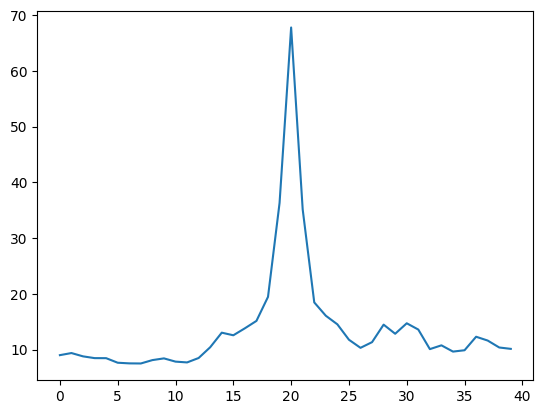

In [32]:
plt.plot(np.arange(40),result_dataset.mean(axis=0))

In [99]:
df_FB_new

,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7,acc_8,acc_9,acc_10,...,acc_392,acc_393,acc_394,acc_395,acc_396,acc_397,acc_398,acc_399,acc_400,label
0,11.354808,14.382049,15.820499,15.024461,10.679914,8.260951,6.858257,6.732312,9.967863,13.871541,...,9.540002,9.762068,9.966300,9.867426,9.720777,9.599828,9.801944,9.814090,9.729410,fall
1,8.405251,8.224548,8.035003,7.834481,7.765506,8.164863,8.023271,7.730527,7.442483,7.266892,...,9.577357,9.568340,9.585433,9.638425,9.702084,9.658688,9.726178,9.697599,9.578712,fall
2,6.422893,7.185761,8.171982,8.393519,7.090346,6.561080,8.010496,8.367414,8.924077,8.669544,...,9.758670,9.530349,9.656971,9.653191,9.578519,9.704148,9.689051,9.554759,9.582951,fall
3,9.703776,7.881743,7.390570,5.443164,9.305277,8.385821,8.393119,8.515401,8.657229,9.200425,...,9.965221,9.901278,9.817494,9.787565,9.844459,10.002932,9.733430,9.966074,9.893050,fall
4,10.036743,10.152382,9.935410,10.100853,9.532577,9.480009,9.486789,9.442366,9.624867,9.973059,...,9.756312,9.803093,9.739541,9.754242,9.818701,9.871261,9.806432,9.792100,9.745047,fall


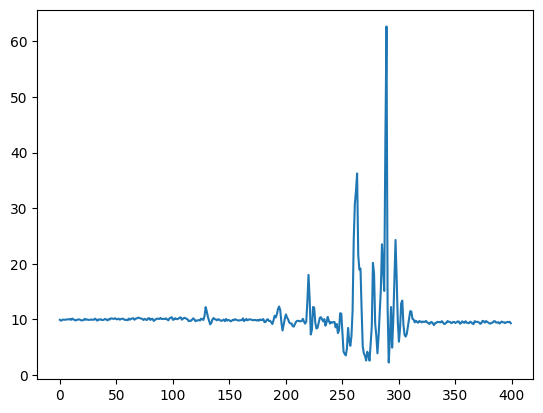

In [47]:
plt.plot(np.arange(400), df_FF_new.iloc[0,:400]*9.81)


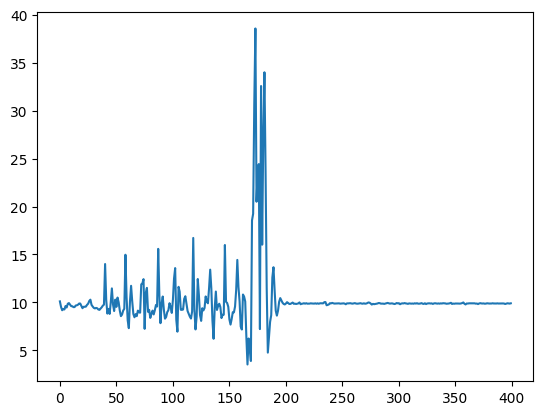

In [46]:
plt.plot(np.arange(400), df.iloc[0,:400])